In [1]:
import os

In [2]:
root_path = '../ipVezbe7Inf/ebart/ebart/VektoriEbart-5/Skup/'

corpus = []
classes = []

for class_name in os.listdir(root_path):
    class_dir = os.path.join(root_path, class_name)
    for file_name in os.listdir(class_dir):
        with open(os.path.join(class_dir, file_name)) as f:
            word_counts = {}
            for line in f:
                word, count = line.split()
                word_counts[word] = int(count)
            corpus.append(word_counts)
            classes.append(class_name)

In [5]:
len(corpus)

3492

In [6]:
len(classes)

3492

In [7]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
dv = DictVectorizer()

In [9]:
X = dv.fit_transform(corpus)

In [11]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
dv.feature_names_

['ab',
 'abasu',
 'abati',
 'abc',
 'abdul',
 'abdulah',
 'abe',
 'aberdin',
 'abhaziji',
 'abida',
 'aboliranxa',
 'abom',
 'abonmana',
 'abortus',
 'abramovicyu',
 'abrasxevicx',
 'abs',
 'abu',
 'ac',
 'aca',
 'acb',
 'acdi',
 'ace',
 'acetylene',
 'ackovicx',
 'acom',
 'acovicx',
 'acta',
 'acu',
 'acxima',
 'acximov',
 'acximovicx',
 'acxina',
 'acye',
 'acyucene',
 'ad',
 'ada',
 'adaldxize',
 'adamicya',
 'adamovicx',
 'adams',
 'adamson',
 'adana',
 'adancyicx',
 'adaptaciju',
 'adaptiranu',
 'adaptivnost',
 'addicted',
 'adekvanti',
 'adekvatan',
 'adekvatnijeg',
 'adekvatnom',
 'adele',
 'adelman',
 'adem',
 'adenauer',
 'adere',
 'adica',
 'adidas',
 'adidye',
 'adijano',
 'adili',
 'adilija',
 'adios',
 'adis',
 'aditivi',
 'administracija',
 'administrativnih',
 'administrator',
 'admiral',
 'adnan',
 'adolescent',
 'adolfa',
 'adore',
 'adorno',
 'adrana',
 'adrenalin',
 'adresa',
 'adresom',
 'adria',
 'adriakoop',
 'adrijano',
 'ads',
 'adut',
 'adventiskicyke',
 'adven

In [13]:
import pandas as pd

In [14]:
df = pd.DataFrame(X.toarray(), columns=dv.feature_names_)

In [15]:
df.head()

,ab,abasu,abati,abc,abdul,abdulah,abe,aberdin,abhaziji,abida,...,zxurno,zxustel,zxustrine,zxustro,zxuticx,zxutih,zxutilovine,zxuto,zxutra,zxuzxa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df, classes, test_size=0.3, stratify=classes)

In [18]:
X_train.shape

(2444, 36830)

In [19]:
X_test.shape

(1048, 36830)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
model = MultinomialNB()

In [22]:
model.fit(X_train, y_train)

MultinomialNB()

In [23]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
accuracy_score(y_test, y_pred)

0.8759541984732825

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 85,   3,   1,  11,   0],
       [  6, 122,   3,  54,   1],
       [  1,   2, 179,   5,   1],
       [  6,  19,   5, 248,   3],
       [  0,   6,   1,   2, 284]], dtype=int64)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = model.predict(X_test)

In [33]:
accuracy_scoreuracy_score(y_test, y_pred)

0.7213740458015268

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier()

In [36]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.6240458015267175

# MLP

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('../iris.csv')

In [42]:
X = df.drop('Species', axis=1)

In [43]:
varietyX.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y = df['Species']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
# suma po svim trening instancama (y - y_p)^2

In [61]:
model = MLPClassifier(hidden_layer_sizes=(50, 5), max_iter=30)

In [62]:
model.fit(X_train, y_train)

C:\Users\User\miniconda3\envs\ip\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 5), max_iter=30)

In [63]:
y_pred = model.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0,  2, 13],
       [ 0,  4, 11]], dtype=int64)

# PCA

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('../iris.csv')

In [9]:
# feature_names = X.
X = df.drop("Species", axis=1)
feature_names = X.columns.tolist()
feature_names

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [10]:
y = df['Species']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [14]:
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [17]:
pca.fit(X)

PCA()

In [18]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [19]:
pca_names

['pca_0', 'pca_1', 'pca_2', 'pca_3']

In [20]:
X = pd.DataFrame(pca.transform(X), columns=pca_names)

In [21]:
X

,pca_0,pca_1,pca_2,pca_3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [22]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [23]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [24]:
from matplotlib import pyplot as plt

<BarContainer object of 4 artists>

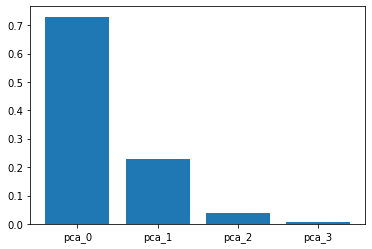

In [25]:
plt.bar(pca_names, pca.explained_variance_ratio_)

In [26]:
import numpy as np

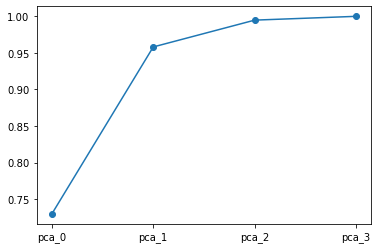

In [28]:
plt.plot(pca_names, np.cumsum(pca.explained_variance_ratio_), marker='o')

In [29]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [30]:
class_names = y.unique()

In [31]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
colors = ['red', 'green', 'blue']

In [37]:
y[y == 'setosa'].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

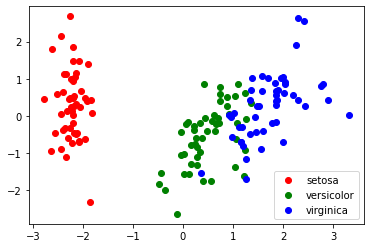

In [40]:
varietyfor i, class_name in enumerate(class_names):
    class_instances = X.iloc[y[y == class_name].index]
    
    plt.scatter(class_instances['pca_0'], class_instances['pca_1'], color=colors[i], label=class_name)
    
plt.legend(loc='best')